In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [25]:
from sklearn.datasets import make_blobs

In [26]:
X, y = make_blobs(n_samples = 1000 , centers = 3, n_features = 2)
# centers tell us the number of categores orthe number of clusters from which 1000 points taken 
# in our problem we would be using only X which has data , not y having labels

In [27]:
X

array([[-0.13017639,  5.42882736],
       [ 2.41679576, -2.47335484],
       [ 1.79812109, -4.2689813 ],
       ...,
       [-1.28037347,  6.36080885],
       [-1.36155756,  3.6653341 ],
       [ 2.86959577, -2.19417105]])

In [28]:
y

array([0, 2, 2, 1, 0, 1, 1, 1, 2, 2, 0, 2, 0, 2, 2, 1, 2, 0, 0, 1, 2, 2,
       0, 0, 1, 2, 1, 0, 0, 2, 0, 1, 2, 1, 1, 0, 2, 0, 2, 1, 0, 0, 1, 2,
       2, 2, 1, 0, 1, 2, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 2, 2, 1, 2, 2,
       0, 2, 0, 0, 2, 1, 1, 0, 0, 1, 0, 1, 1, 2, 1, 1, 0, 2, 0, 0, 2, 2,
       0, 1, 1, 0, 1, 2, 2, 0, 1, 0, 1, 2, 1, 0, 2, 1, 2, 1, 0, 2, 1, 2,
       0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 2, 2, 1, 0, 2, 0, 1, 0, 1, 1, 2, 2, 2, 1, 0, 1, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 1, 0, 0, 2, 2, 1, 1, 1, 1, 1, 2, 1, 0, 0,
       0, 0, 1, 2, 0, 2, 0, 1, 2, 0, 1, 1, 2, 0, 2, 2, 0, 1, 2, 2, 2, 1,
       2, 2, 1, 0, 2, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 2,
       0, 2, 2, 1, 2, 2, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 2, 0, 2, 2, 2, 1,
       2, 1, 2, 1, 2, 1, 1, 0, 2, 2, 0, 0, 0, 0, 2, 1, 2, 2, 0, 2, 0, 0,
       2, 2, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0, 0,
       0, 1, 2, 2, 0, 1, 1, 0, 1, 0, 0, 0, 2, 2, 1,

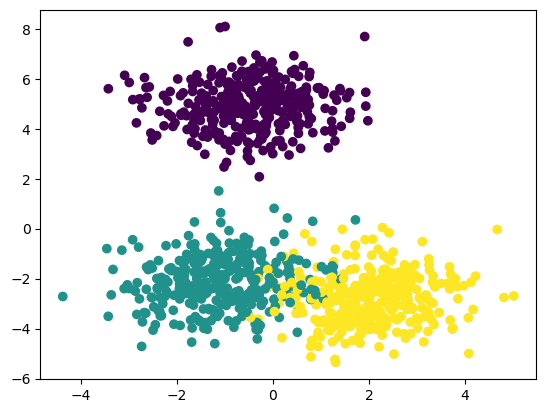

In [29]:
plt.scatter(X[:,0], X[:,1], c= y)

# plt.scatter(X[:, 0], X[:, 1], c=y)

In [30]:
## using standardscaler 
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [32]:
## performing the train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)

In [33]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### elbow method to get the appropriate k values

In [34]:
from sklearn.cluster import KMeans

In [35]:
##wcss for each number of clusters
wcss = [] ##som of squaare of distince of points withing cluster to the nearest centroid
for k in range(1,11):
    kmeans = KMeans(n_clusters = k , init = 'k-means++')
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [36]:
wcss

[1339.9999999999986,
 693.9389353953941,
 260.4685447066058,
 209.82826251581477,
 176.3325955365898,
 125.711620476503,
 111.50411687103369,
 104.51391238098839,
 90.73094221604939,
 91.5542023162303]

In [37]:
## wcss keep on decreasins as k increases

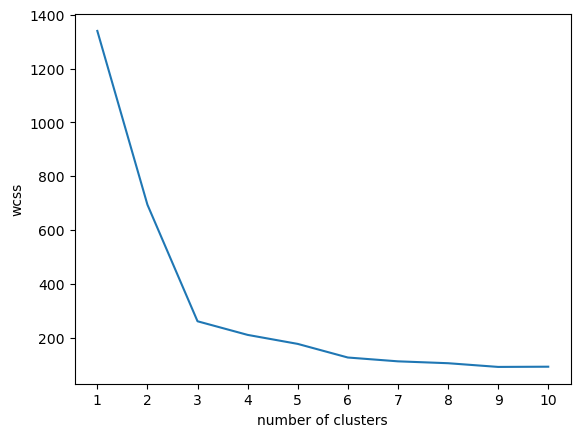

In [41]:
## plot elobow curve
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()

In [42]:
## 3 looks like the best option since here elbow is being formed

In [43]:
## since we chose centers as 3 so that helps in validation

In [44]:
## now we can fir and predict on train_scaled data

In [45]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')

In [46]:
kmeans.fit_predict(X_train_scaled)

array([2, 1, 0, 1, 2, 2, 0, 1, 0, 1, 2, 2, 1, 0, 2, 1, 2, 2, 0, 0, 1, 1,
       2, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0,
       1, 1, 0, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 0, 0, 2,
       1, 0, 1, 2, 0, 2, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 2, 1, 2, 0,
       0, 2, 2, 0, 2, 1, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 1, 0, 2, 2,
       2, 0, 0, 1, 1, 2, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 1, 2, 0, 0, 2, 0,
       1, 1, 2, 0, 0, 2, 1, 0, 1, 2, 1, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 2,
       1, 1, 0, 2, 1, 2, 0, 1, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       2, 1, 0, 0, 1, 0, 0, 2, 0, 2, 0, 1, 1, 0, 2, 0, 0, 1, 2, 2, 1, 2,
       2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2, 2,
       0, 1, 0, 2, 0, 2, 2, 0, 0, 2, 1, 2, 1, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1,

In [49]:
## predict on test data
y_pred = kmeans.predict(X_test)

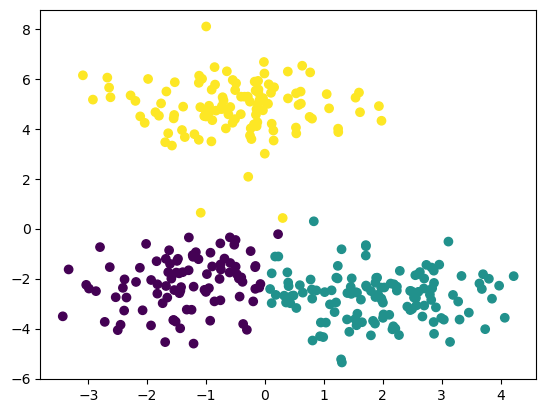

In [51]:
## scatter plot for test data
plt.scatter(X_test[:,0],X_test[:,1],c = y_pred)

### validation k value

In [52]:
## sometimes its not that clear and easy to choose the k value
## kneelocator is used
## silhoutee is used

In [53]:
## kneelocator

In [54]:
# !pip install kneed

In [55]:
from kneed import KneeLocator

In [58]:
kl = KneeLocator(range(1,11), wcss, curve = 'convex', direction = 'decreasing')

In [59]:
kl.elbow

3

In [60]:
## silohoute scoring

In [63]:
from sklearn.metrics import silhouette_score

In [69]:
sil_coff = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k , init = 'k-means++')
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled , kmeans.labels_ )
    sil_coff.append(score)

In [71]:
sil_coff

[0.4442976014832301,
 0.5976340434406234,
 0.505948449990553,
 0.44121684418325846,
 0.4085516263881157,
 0.386280196559842,
 0.38965097058110826,
 0.34037797141153914,
 0.3471452241449409]

Text(0, 0.5, 'sill coeff')

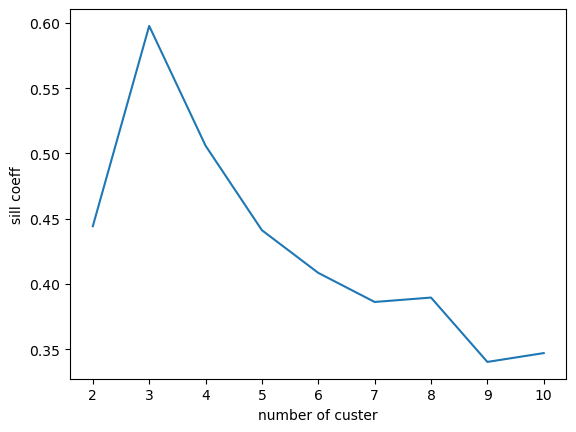

In [74]:
# plot sil _coff 
## shoudl be max for chosen number
plt.plot(range(2,11), sil_coff)
plt.xticks(range(2,11))
plt.xlabel("number of custer")
plt.ylabel("sill coeff")